In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cores:
verde = '#2ca02c'
azul = '#1f77b4'
rosa = 'palevioletred'
azulclaro = 'skyblue'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("/content/drive/MyDrive/Visualização de dados/base_vendas_sazonalidade_ajustada.csv") # Lorena
df = pd.read_csv("/content/drive/MyDrive/Colab/base_vendas_sazonalidade_ajustada.csv") # Béa
df.head()

,ID_Venda,Data_Venda,Cliente,Sexo,Idade,Produto,Categoria,Tamanho,Cor,Quantidade,Preço_Unitário,Forma_Pagamento,Estado,Cidade,Vendedor,Canal_Venda,Desconto (%),Avaliação (1-5)
0,1,2025-06-21,Antônio Freitas,F,55,Bermuda Cargo,Calça,M,Verde,1,105.70,Pix,SP,Santos,Lucas Pires,Loja Física,20,3
1,2,2025-12-21,Daniel Cavalcanti,M,55,Vestido Floral,Vestido,G,Amarelo,1,190.21,Dinheiro,RS,Caxias do Sul,Lucas Pires,Loja Física,5,5
2,3,2025-11-12,Dra. Ana Laura Pereira,M,24,Saia Plissada,Saia,M,Branco,1,289.20,Dinheiro,MG,Belo Horizonte,Marcos Silva,Online,0,5
3,4,2025-12-01,Bryan da Rosa,M,54,Blazer Feminino,Casaco,G,Preto,2,69.60,Cartão Débito,MG,Contagem,Lucas Pires,Loja Física,20,5
4,5,2025-11-18,Maria Araújo,F,41,Calça Jeans Skinny,Calça,36,Rosa,1,144.93,Dinheiro,BA,Vitória da Conquista,Fernanda Lima,Online,10,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Venda         1600 non-null   int64  
 1   Data_Venda       1600 non-null   object 
 2   Cliente          1600 non-null   object 
 3   Sexo             1600 non-null   object 
 4   Idade            1600 non-null   int64  
 5   Produto          1600 non-null   object 
 6   Categoria        1600 non-null   object 
 7   Tamanho          1600 non-null   object 
 8   Cor              1600 non-null   object 
 9   Quantidade       1600 non-null   int64  
 10  Preço_Unitário   1600 non-null   float64
 11  Forma_Pagamento  1600 non-null   object 
 12  Estado           1600 non-null   object 
 13  Cidade           1600 non-null   object 
 14  Vendedor         1600 non-null   object 
 15  Canal_Venda      1600 non-null   object 
 16  Desconto (%)     1600 non-null   int64  
 17  Avaliação (1-5

In [ ]:
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
df['Semana'] = df['Data_Venda'].dt.isocalendar().week
df

,ID_Venda,Data_Venda,Cliente,Sexo,Idade,Produto,Categoria,Tamanho,Cor,Quantidade,Preço_Unitário,Forma_Pagamento,Estado,Cidade,Vendedor,Canal_Venda,Desconto (%),Avaliação (1-5),Semana
0,1,2025-06-21,Antônio Freitas,F,55,Bermuda Cargo,Calça,M,Verde,1,105.70,Pix,SP,Santos,Lucas Pires,Loja Física,20,3,25
1,2,2025-12-21,Daniel Cavalcanti,M,55,Vestido Floral,Vestido,G,Amarelo,1,190.21,Dinheiro,RS,Caxias do Sul,Lucas Pires,Loja Física,5,5,51
2,3,2025-11-12,Dra. Ana Laura Pereira,M,24,Saia Plissada,Saia,M,Branco,1,289.20,Dinheiro,MG,Belo Horizonte,Marcos Silva,Online,0,5,46
3,4,2025-12-01,Bryan da Rosa,M,54,Blazer Feminino,Casaco,G,Preto,2,69.60,Cartão Débito,MG,Contagem,Lucas Pires,Loja Física,20,5,49
4,5,2025-11-18,Maria Araújo,F,41,Calça Jeans Skinny,Calça,36,Rosa,1,144.93,Dinheiro,BA,Vitória da Conquista,Fernanda Lima,Online,10,5,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,2025-12-23,Sra. Milena Oliveira,F,56,Bermuda Cargo,Calça,M,Amarelo,3,235.04,Boleto,MG,Belo Horizonte,Marcos Silva,Loja Física,15,1,52
1596,1597,2025-04-04,Vicente Araújo,M,50,Blazer Feminino,Casaco,P,Verde,3,228.86,Dinheiro,MG,Feira de Santana,Fernanda Lima,Online,20,2,14
1597,1598,2025-11-12,Letícia Pinto,M,43,Jaqueta Jeans,Casaco,G,Vermelho,2,62.29,Cartão Crédito,BA,Niterói,Fernanda Lima,Online,20,5,46
1598,1599,2025-07-03,Leandro Santos,M,48,Moletom com Capuz,Casaco,P,Azul,1,136.80,Cartão Crédito,RJ,Florianópolis,Marcos Silva,Loja Física,20,5,27


In [ ]:
# Criar coluna de faturamento
df["Faturamento"] = df["Quantidade"] * df["Preço_Unitário"] * (1 - df["Desconto (%)"]/100)

In [ ]:
# Indicadores principais
faturamento_total = df["Faturamento"].sum()
ticket_medio = df["Faturamento"].sum() / df["Cliente"].nunique()
clientes_ativos = df["Cliente"].nunique()
avaliacao_media = df["Avaliação (1-5)"].mean()

print("Faturamento total:", faturamento_total)
print("Ticket médio:", ticket_medio)
print("Clientes ativos:", clientes_ativos)
print("Avaliação média:", avaliacao_media)

Faturamento total: 504345.07700000005
Ticket médio: 429.2298527659575
Clientes ativos: 1175
Avaliação média: 3.825625


In [ ]:
df["AnoMes"] = pd.to_datetime(df["Data_Venda"]).dt.to_period("M")
mensal = df.groupby("AnoMes")["Faturamento"].sum()

## Etapa 3: Criação de gráficos de distribuição, quantidades e proporções e relações com linhas de tendência e gráficos no Python e uso de uma base de dados real.

Distribuição

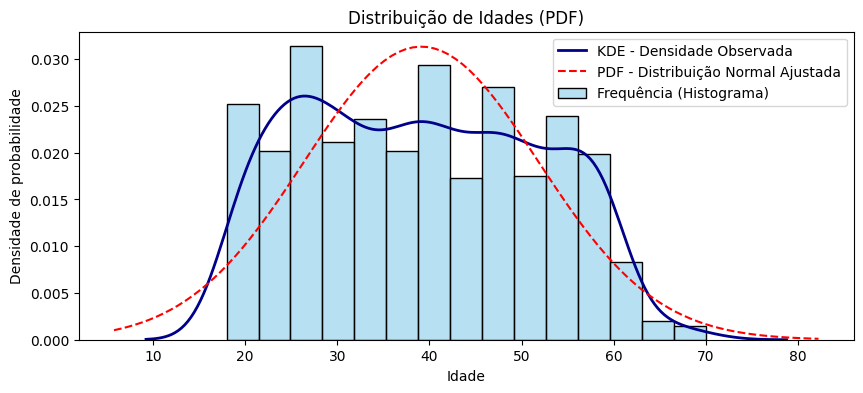

In [ ]:
from scipy.stats import norm

# PDF (função densidade)
plt.figure(figsize=(10,4))

# 1. Histograma:
sns.histplot(df['Idade'], stat="density", bins=15, color="skyblue",
             edgecolor='black', alpha=0.6,
             # Use um label para o histograma se quiser que ele apareça na legenda
             # Ou mantenha apenas o 'sns.kdeplot' e 'plt.plot' na legenda.
             label='Frequência (Histograma)')

# 2. KDE (Linha Azul):
sns.kdeplot(df['Idade'], color='darkblue', linewidth=2,
            label='KDE - Densidade Observada')

# 3. Curva Normal Ajustada (Linha Vermelha):
mu, sigma = norm.fit(df['Idade'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, "r--", label='PDF - Distribuição Normal Ajustada')

# 4. Adiciona a legenda ao gráfico:
plt.legend()

# 5. Título e labels dos eixos
plt.title("Distribuição de Idades (PDF)")
plt.xlabel("Idade")
plt.ylabel("Densidade de probabilidade")
plt.show()


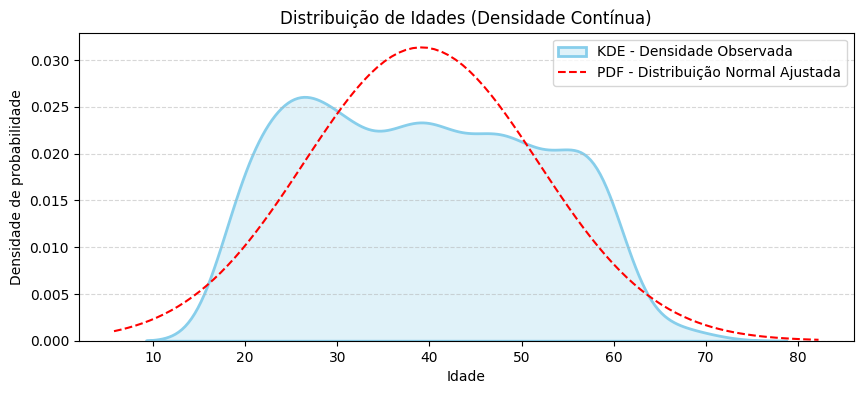

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Assumindo que 'df' está definido e que você já importou as bibliotecas

# PDF (função densidade)
plt.figure(figsize=(10,4))

# 1. KDE (Linha Azul): Curva de densidade observada (agora é o gráfico principal)
# O KDE já representa o eixo X de forma contínua.
sns.kdeplot(df['Idade'], color='skyblue', fill=True, linewidth=2,
            label='KDE - Densidade Observada')

# 2. Curva Normal Ajustada (Linha Vermelha): Mantida como referência
mu, sigma = norm.fit(df['Idade'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, "r--", label='PDF - Distribuição Normal Ajustada')

# 3. Adiciona a legenda e títulos
plt.legend()
plt.title("Distribuição de Idades (Densidade Contínua)")
plt.xlabel("Idade")
plt.ylabel("Densidade de probabilidade")
plt.grid(axis='y', alpha=0.5, linestyle='--') # Opcional: Adiciona grades leves
plt.show()

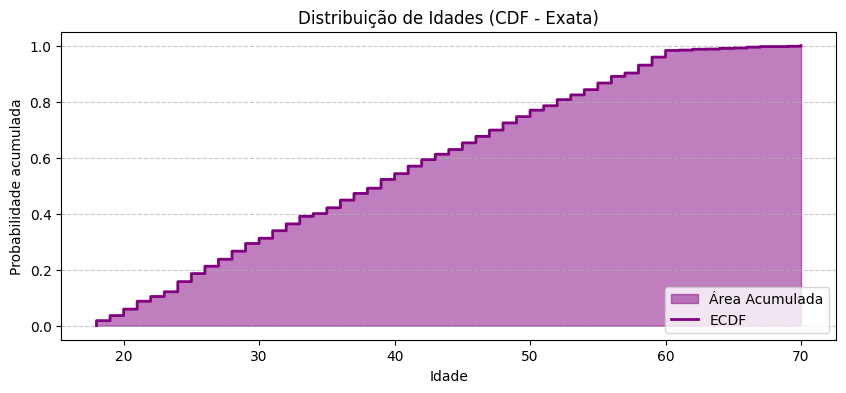

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
# Assumindo que 'df' está definido

# 1. Calcular a ECDF empiricamente
ecdf = ECDF(df['Idade'])
x = ecdf.x
y = ecdf.y

plt.figure(figsize=(10,4))

# 2. Preenchimento (FILL)
# Usa plt.fill_between para preencher a área entre a ECDF e o eixo X (y=0)
# 'step="post"' garante o formato de degraus (escadinha)
plt.fill_between(x, y,
                 step="post", # A CHAVE para manter os degraus
                 color="purple",
                 alpha=0.5,
                 label='Área Acumulada')

# 3. Linha de Degraus (ECDF)
# Plota a linha por cima do preenchimento
plt.plot(x, y,
         color="purple",
         linewidth=2,
         drawstyle='steps-post', # Equivalente ao step="post"
         label='ECDF')

# 4. Ajustes Finais
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grade para facilitar a leitura
plt.title("Distribuição de Idades (CDF - Exata)")
plt.xlabel("Idade")
plt.ylabel("Probabilidade acumulada")
plt.legend(loc='lower right')
plt.show()

Quantidade e proporções

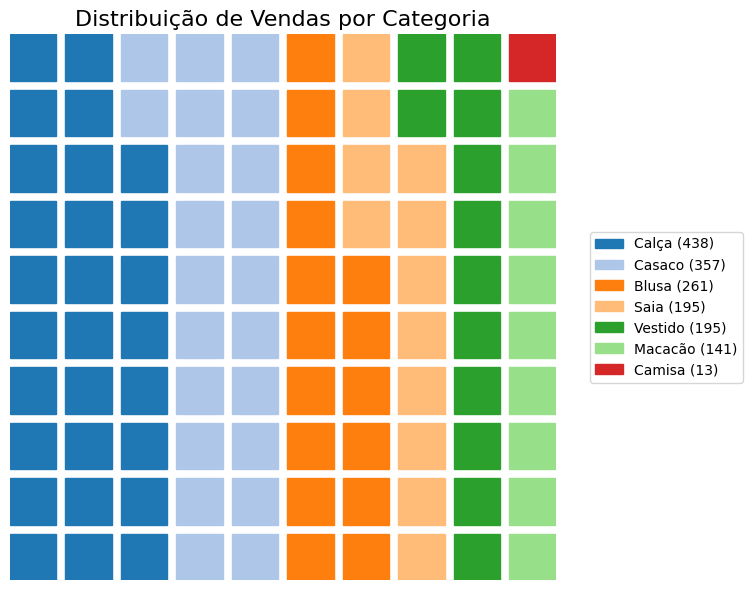

In [ ]:
from pywaffle import Waffle

# Contagem original
counts = df['Categoria'].value_counts()

total_blocks = 100
prop = (counts / counts.sum() * total_blocks).round().astype(int)

diff = total_blocks - prop.sum()
if diff > 0:
    for i in range(diff):
        prop.iloc[i % len(prop)] += 1
elif diff < 0:
    for i in range(-diff):
        prop.iloc[i % len(prop)] -= 1

values = prop.to_dict()
labels = [f"{k} ({v})" for k, v in zip(counts.index, counts.values)]

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=values,
    figsize=(12, 6),
    labels=labels,
    colors=plt.cm.tab20.colors[:len(values)],
    legend={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5), 'fontsize': 10}
)

plt.title("Distribuição de Vendas por Categoria", fontsize=16)
plt.tight_layout()
plt.show()


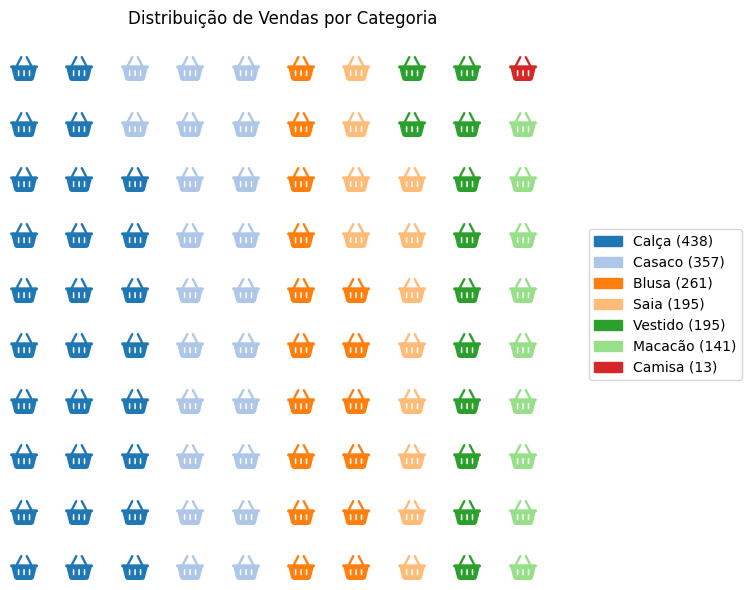

In [ ]:
# Contagem por categoria
counts = df['Categoria'].value_counts()

total_blocks = 100
prop = (counts / counts.sum() * total_blocks).round().astype(int)
diff = total_blocks - prop.sum()
if diff > 0:
    for i in range(diff):
        prop.iloc[i % len(prop)] += 1
elif diff < 0:
    for i in range(-diff):
        prop.iloc[i % len(prop)] -= 1

# Criar gráfico
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=prop.to_dict(),
    figsize=(12, 6),
    # icons='tshirt',
    icons='basket-shopping',
    icon_size=18,
    colors=plt.cm.tab20.colors[:len(prop)],
    legend={'loc': 'center left', 'bbox_to_anchor': (1.05, 0.5), 'fontsize': 10},
    labels=[f"{cat} ({val})" for cat, val in zip(counts.index, counts.values)])

plt.title("Distribuição de Vendas por Categoria", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
!pip install squarify

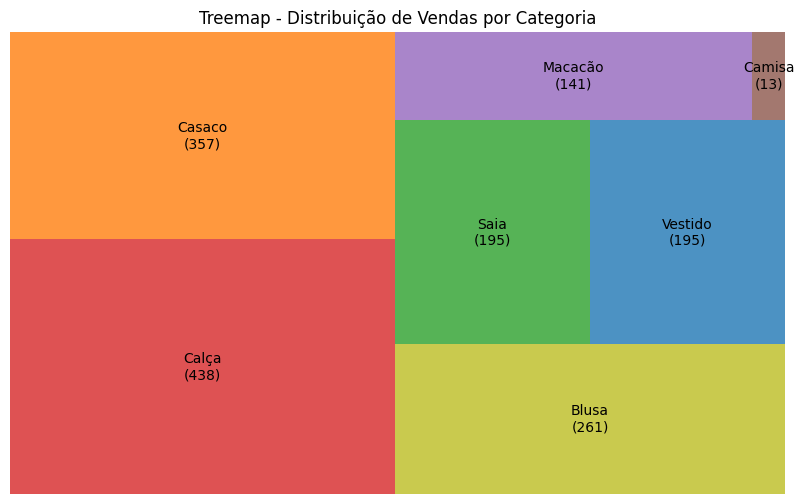

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

categoria_counts = df['Categoria'].value_counts()

# Definir cores
cores_personalizadas = [
    '#D62728',  # Vermelho (Red)
    '#FF7F0E',  # Laranja (Orange)
    '#BCBD22',  # Amarelo Esverdeado (Yellow/Lime)
    '#2CA02C',  # Verde (Green)
    '#1F77B4',  # Azul (Blue)
    '#9467BD',  # Índigo/Anil (Indigo/Deep Purple)
    '#8C564B'   # Violeta/Marrom (Brownish Red/Violet, para não ser muito escuro)
]

# Criar treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=categoria_counts.values,
    label=[f"{cat}\n({val})" for cat, val in zip(categoria_counts.index, categoria_counts.values)],
    alpha=0.8,
    # 2. Use a lista de cores no parâmetro 'color'
    color=cores_personalizadas
)

plt.title("Treemap - Distribuição de Vendas por Categoria", fontsize=12)
plt.axis("off")
plt.show()


# OBSERVAÇÃO: Meninas podem mudar as cores se preferirem


In [ ]:
df.columns

Index(['ID_Venda', 'Data_Venda', 'Cliente', 'Sexo', 'Idade', 'Produto',
       'Categoria', 'Tamanho', 'Cor', 'Quantidade', 'Preço_Unitário',
       'Forma_Pagamento', 'Estado', 'Cidade', 'Vendedor', 'Canal_Venda',
       'Desconto (%)', 'Avaliação (1-5)', 'Semana', 'Faturamento', 'AnoMes'],
      dtype='object')

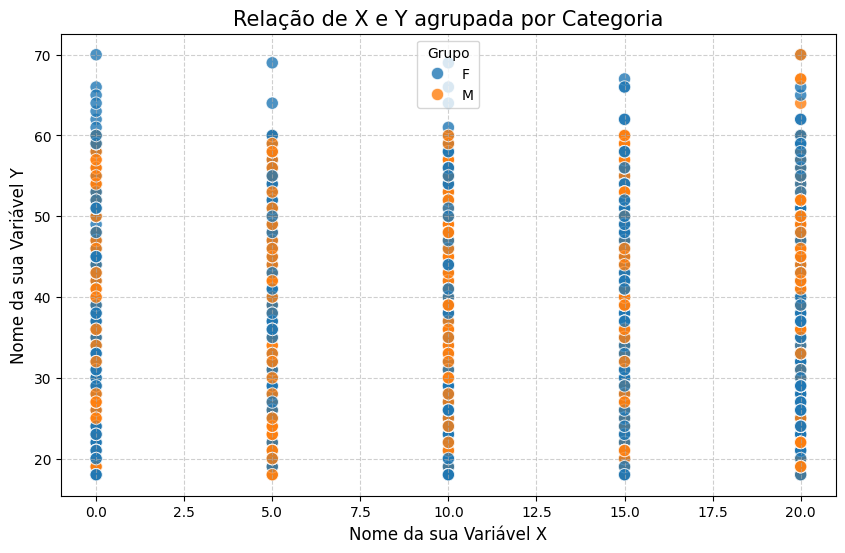

In [ ]:
# Criação do Scatter Plot com HUE (Cor por Categoria)
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Desconto (%)',
    y='Idade',
    data=df,
    hue='Sexo',          # <--- Adiciona uma terceira variável por cor
    s=80,                     # Tamanho um pouco maior para ver a cor
    alpha=0.8
)

# 3. Títulos, Rótulos e Legenda
plt.title('Relação de X e Y agrupada por Categoria', fontsize=15)
plt.xlabel('Nome da sua Variável X', fontsize=12)
plt.ylabel('Nome da sua Variável Y', fontsize=12)
plt.legend(title='Grupo', loc='best') # Mostra a legenda de cores
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()






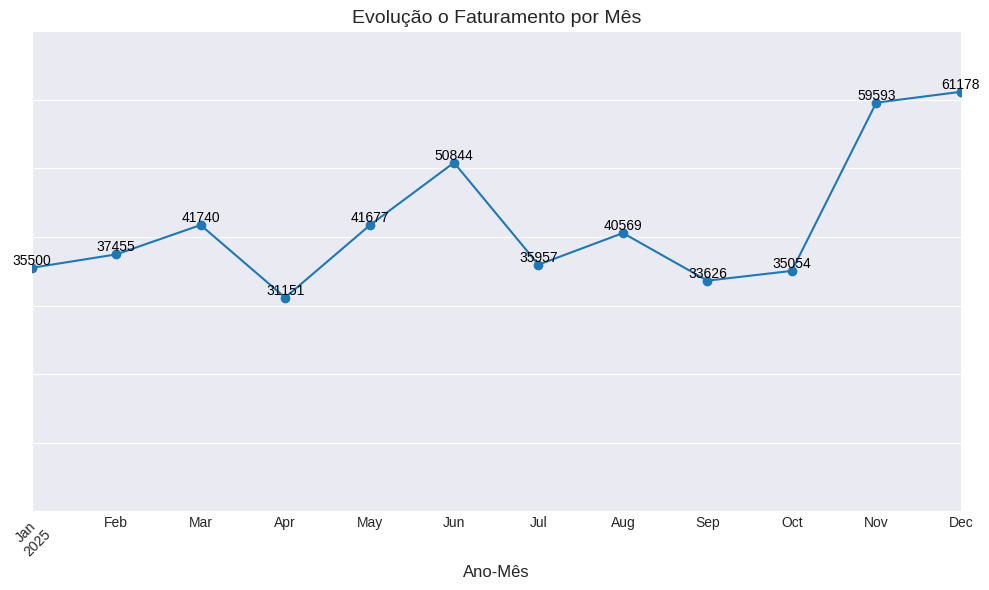

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))

ax = mensal.plot(marker="o")
ax.yaxis.set_ticklabels([])

font_properties = {'size': 10, 'color': 'black'}
# Ajustar os labels de texto:
for x, y in zip(mensal.index.astype(str), mensal):
    ax.text(x, y, f"{y:.0f}", ha="center", va="bottom", fontdict=font_properties)

plt.title("Evolução o Faturamento por Mês", fontsize=14)
# plt.ylabel("Faturamento", fontsize=12)
plt.xlabel("Ano-Mês", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(bottom=0, top=70000)
plt.show()

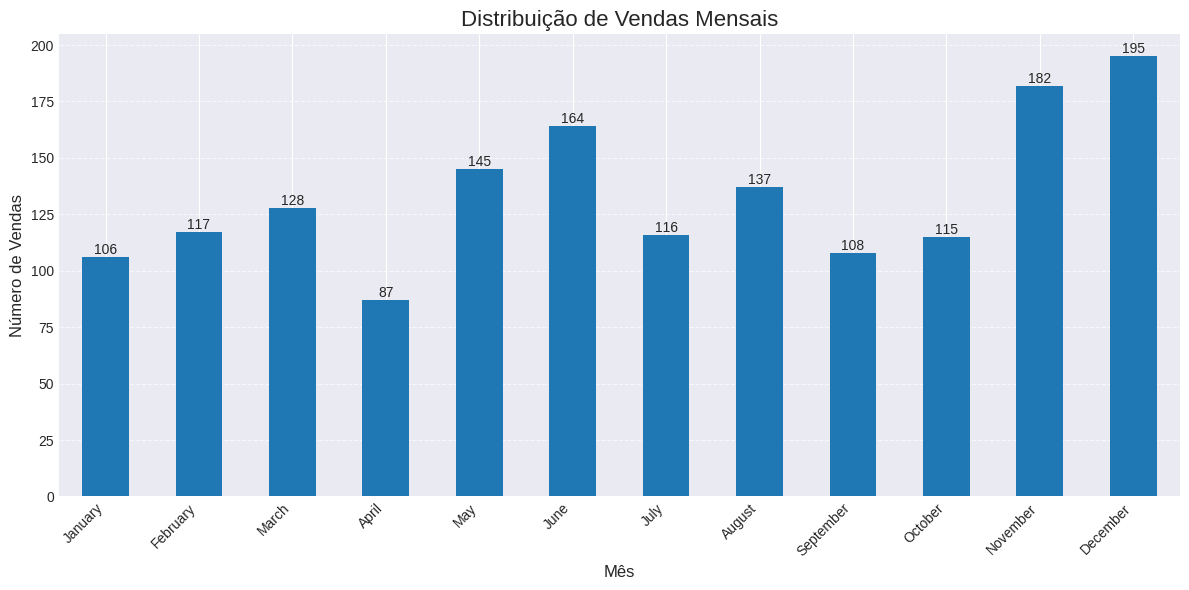

Gráfico 'grafico_vendas_mensal.png' gerado com sucesso.


In [ ]:
import calendar

# Calcular vendas mensais:
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
df['Mes'] = df['Data_Venda'].dt.month
month_counts = df.groupby('Mes').size()

plt.figure(figsize=(12, 6))

# Plota o gráfico de barras:
ax = month_counts.plot(kind='bar', color=azul, zorder=2) # zorder=2 para as barras ficarem na frente da grade

# Adiciona labels de texto:
for i, v in enumerate(month_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Adiciona e formata o título e os rótulos dos eixos.
plt.title('Distribuição de Vendas Mensais', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Vendas', fontsize=12)

# Define os nomes dos meses no eixo X e rotaciona para melhor visualização.
plt.xticks(
    ticks=range(len(month_counts)),
    labels=[calendar.month_name[i] for i in month_counts.index],
    rotation=45,
    ha="right" # Alinha os rótulos rotacionados
)

# Adiciona uma grade no eixo Y para facilitar a leitura dos valores.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout para evitar que os rótulos sejam cortados.
plt.tight_layout()

# Salva a imagem do gráfico em um arquivo.
plt.savefig('grafico_vendas_mensal.png')

# Opcional: exibe o gráfico se estiver executando em um ambiente interativo.
plt.show()

print("Gráfico 'grafico_vendas_mensal.png' gerado com sucesso.")

In [ ]:
df['Idade'].max()

70

/tmp/ipython-input-2830191221.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_por_faixa = df.groupby(['Faixa_Idade', 'Sexo']).size().unstack(fill_value=0)
/tmp/ipython-input-2830191221.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(abs(int(x))) for x in ax.get_xticks()])


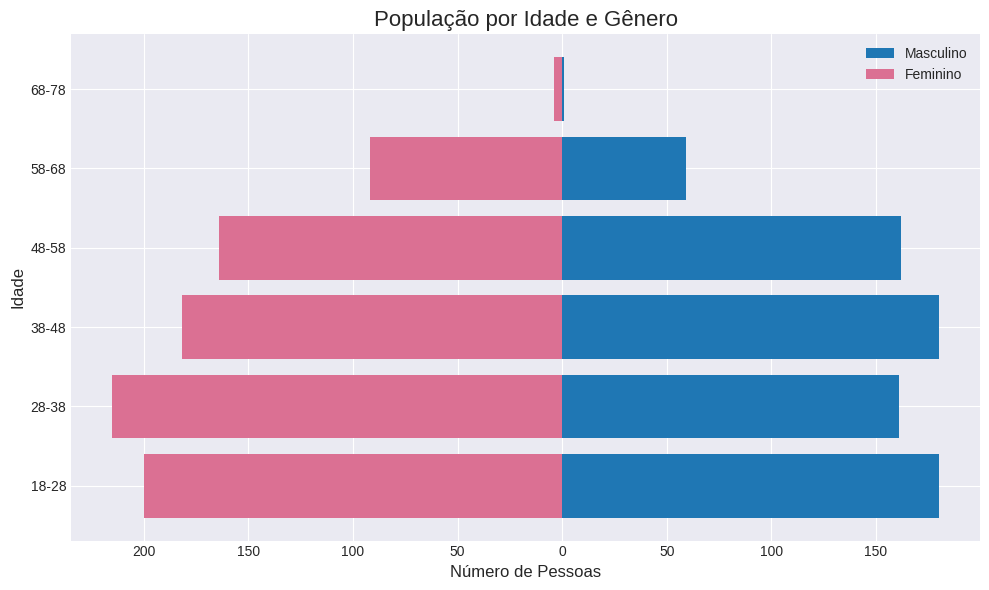

In [ ]:
# Pirâmide etária:
# Definir as faixas etárias
bins = [18, 28, 38, 48, 58, 68, 78]
labels = ['18-28', '28-38', '38-48', '48-58','58-68','68-78']
df['Faixa_Idade'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Contar o número de homens e mulheres por faixa etária
contagem_por_faixa = df.groupby(['Faixa_Idade', 'Sexo']).size().unstack(fill_value=0)

# Extrair as listas para o gráfico
faixas_etarias = contagem_por_faixa.index
masculino = contagem_por_faixa['M'].tolist()
feminino = contagem_por_faixa['F'].tolist()

# Plotar o gráfico
feminino_invertido = [-x for x in feminino]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(faixas_etarias, masculino, color=azul, label='Masculino')
ax.barh(faixas_etarias, feminino_invertido, color=rosa, label='Feminino')

ax.set_title('População por Idade e Gênero', fontsize=16)
ax.set_xlabel('Número de Pessoas', fontsize=12)
ax.set_ylabel('Idade', fontsize=12)
ax.legend()
# ax.set_xticks(range(int(min(feminino_invertido)), int(max(masculino)) + 1, 1))
ax.set_xticklabels([str(abs(int(x))) for x in ax.get_xticks()])
plt.tight_layout()
plt.show()

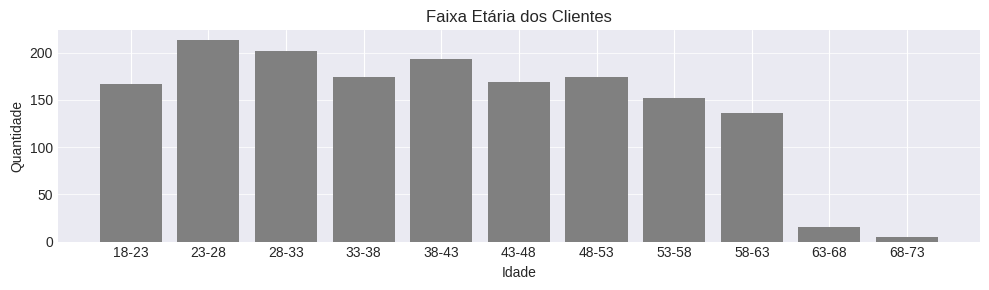

In [ ]:
# Histograma: faixa etária
age_bins = np.arange(18, 78, 5)
age_labels = [f"{age_bins[i]}-{age_bins[i+1]}" for i in range(len(age_bins) - 1)]
bin_centers = (age_bins[:-1] + age_bins[1:]) / 2

plt.figure(figsize=(10, 3))
plt.hist(df["Idade"], bins=age_bins, color="gray", rwidth=0.8)

plt.xticks(bin_centers, labels=age_labels, ha='center')

plt.title("Faixa Etária dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

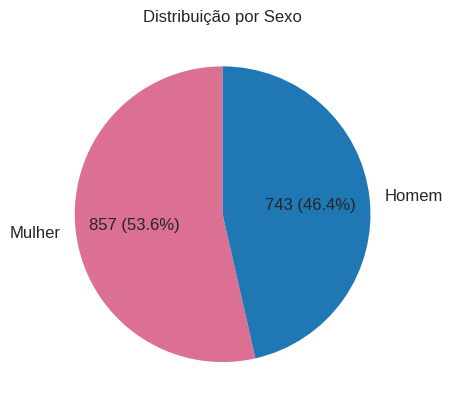

In [ ]:
# Distribuição por sexo - gráfico de pizza
new_labels = {'F': 'Mulher', 'M': 'Homem'}
sexo = df["Sexo"].value_counts()

labels_mapped = [new_labels[label] for label in sexo.index]

plt.pie(sexo, labels=labels_mapped,
        autopct=lambda p: f"{int(p*sum(sexo)/100)} ({p:.1f}%)",
        colors=[rosa, azul],
        startangle=90,
        textprops={"fontsize": 12})
plt.title("Distribuição por Sexo")
plt.show()

In [ ]:
top_produtos = df.groupby("Produto")["Quantidade"].sum().nlargest(10)
top_produtos

,Quantidade
Produto,
Saia Plissada,331
Blazer Feminino,299
Jaqueta Jeans,298
Vestido Floral,297
Bermuda Cargo,292
Camisa Social,292
Macacão Longo,277
Camiseta Básica,276
Short Jeans,263


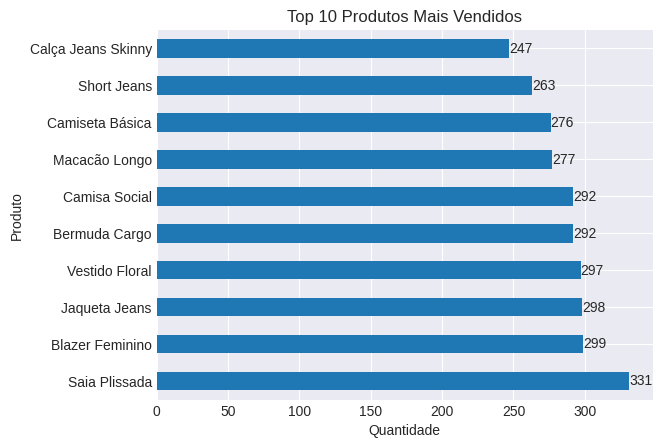

In [ ]:
# Top 10 produtos mais vendidos
top_produtos = df.groupby("Produto")["Quantidade"].sum().nlargest(10)

ax = top_produtos.plot(kind="barh")

for i, v in enumerate(top_produtos):
    ax.text(v, i, str(v), va="center", ha="left")

plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade")
plt.ylabel("Produto")
plt.show()


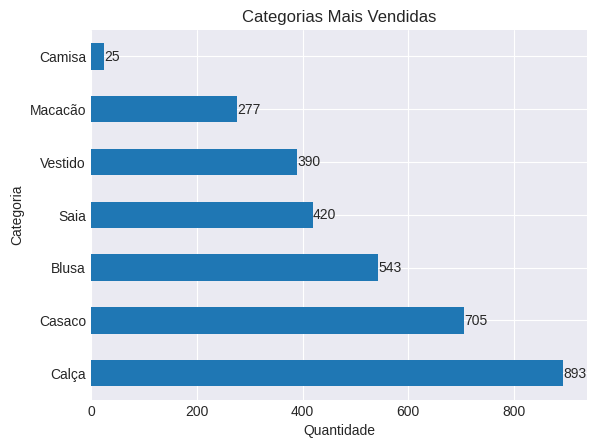

In [ ]:
#  Categorias mais vendidas
cat = df.groupby("Categoria")["Quantidade"].sum().sort_values(ascending=False)

ax = cat.plot(kind="barh")

for i, v in enumerate(cat):
    ax.text(v, i, str(v), va="center", ha="left")

plt.title("Categorias Mais Vendidas")
plt.xlabel("Quantidade")
plt.ylabel("Categoria")
plt.show()



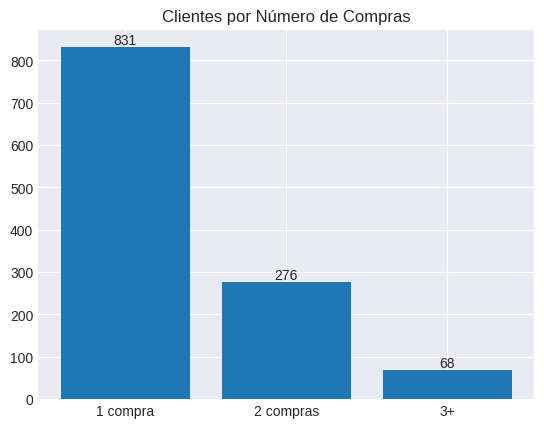

In [ ]:
# Clientes por nº de compras

compras = df.groupby("Cliente")["ID_Venda"].count()
compras_class = compras.value_counts().sort_index()
labels = ["1 compra", "2 compras", "3+"]
contagem = [sum(compras==1), sum(compras==2), sum(compras>=3)]
ax = plt.bar(labels, contagem)
for i, v in enumerate(contagem):
    plt.text(i, v, str(v), ha="center", va="bottom")
plt.title("Clientes por Número de Compras")
plt.show()



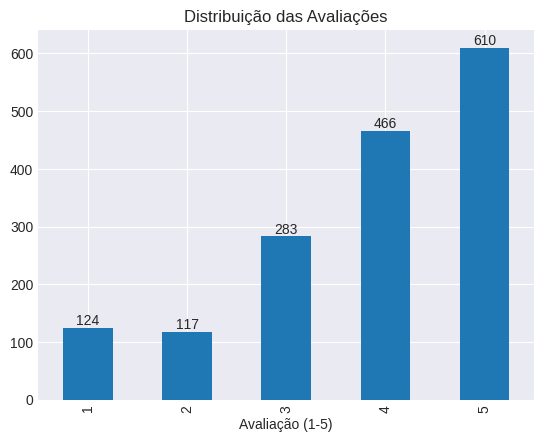

In [ ]:
# Histograma: avaliações

avaliacoes = df["Avaliação (1-5)"].value_counts().sort_index()
ax = avaliacoes.plot(kind="bar")
for i, v in enumerate(avaliacoes):
    ax.text(i, v, str(v), ha="center", va="bottom")
plt.title("Distribuição das Avaliações")
plt.show()



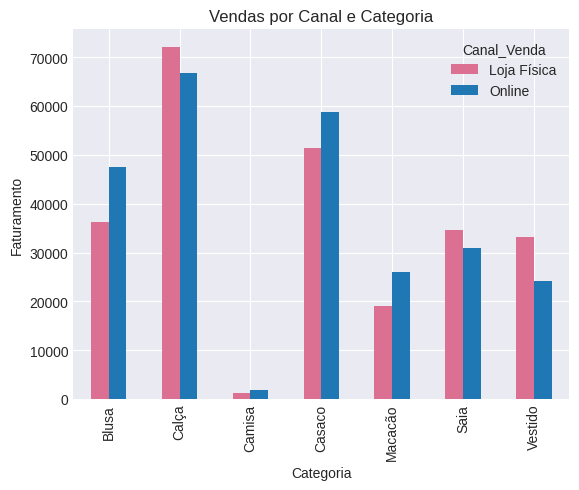

In [ ]:
# Barras paralelas: vendas por canal

canal_cat = df.pivot_table(values="Faturamento", index="Categoria", columns="Canal_Venda", aggfunc="sum", fill_value=0)
canal_cat.plot(kind="bar", color= [rosa, azul])
plt.title("Vendas por Canal e Categoria")
plt.ylabel("Faturamento")
plt.show()



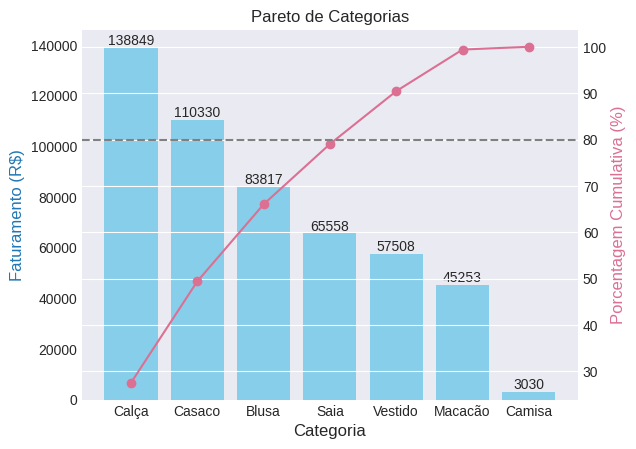

In [ ]:
# Gráfico de Pareto: categorias por receita

cat_receita = df.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)
cumperc = cat_receita.cumsum()/cat_receita.sum()*100

fig, ax1 = plt.subplots()
ax1.grid(False)
ax1.bar(cat_receita.index, cat_receita, color=azulclaro)
ax2 = ax1.twinx()
ax2.plot(cat_receita.index, cumperc, color=rosa, marker="o")
ax2.axhline(80, color="gray", linestyle="--")


# Adicionando os rótulos aos eixos
ax1.set_ylabel('Faturamento (R$)', fontsize=12, color=azul)
ax2.set_ylabel('Porcentagem Cumulativa (%)', fontsize=12, color=rosa)
ax1.set_xlabel('Categoria', fontsize=12) # Rótulo do eixo X

for i, v in enumerate(cat_receita):
    ax1.text(i, v, f"{v:.0f}", ha="center", va="bottom")
plt.title("Pareto de Categorias")
plt.show()

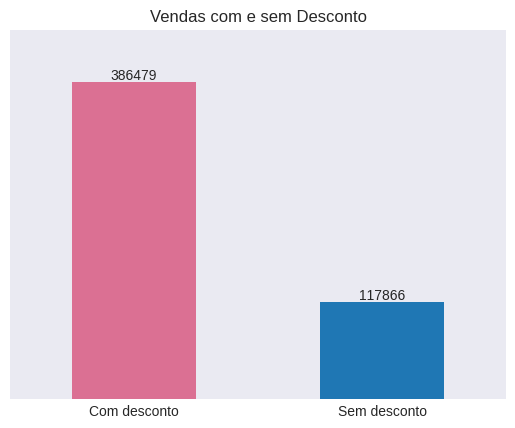

In [ ]:
# Comparação: vendas com e sem desconto

df["Tem_Desconto"] = np.where(df["Desconto (%)"]>0, "Com desconto", "Sem desconto")
desc = df.groupby("Tem_Desconto")["Faturamento"].sum()
ax = desc.plot(kind="bar", color=[rosa,azul])
for i, v in enumerate(desc):
    ax.text(i, v, f"{v:.0f}", ha="center", va="bottom")
plt.xticks(rotation=0)
ax.set_xlabel(None)
ax.grid(False)
plt.ylim(bottom=0, top=450000)
ax.set_yticks([])
plt.title("Vendas com e sem Desconto")
plt.show()


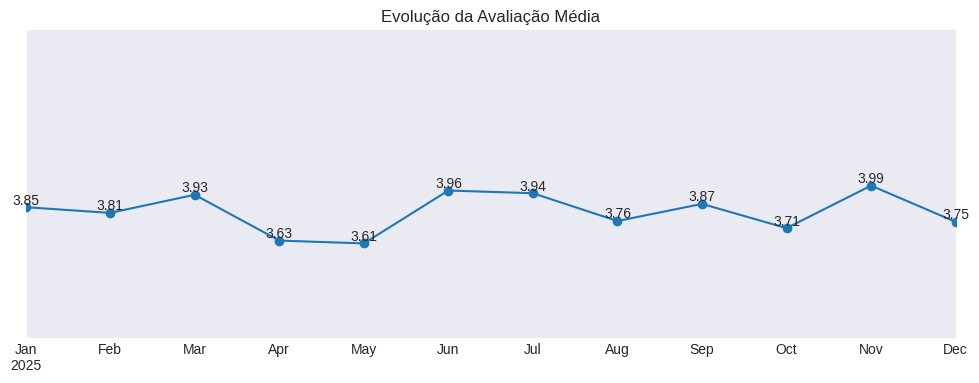

In [ ]:
# Evolução da avaliação média (corrigido)

aval_mes = df.groupby("AnoMes")["Avaliação (1-5)"].mean()
plt.figure(figsize=(12, 4))

ax = aval_mes.plot(marker="o", color=azul)

# Usar o índice (datas) no eixo X

for x, y in zip(aval_mes.index, aval_mes):
    ax.text(x, y, f"{y:.2f}", ha="center", va="bottom")


plt.title("Evolução da Avaliação Média")

ax.set_yticks([])
# plt.xticks(rotation=45)
plt.xlabel(None)
# plt.ylabel("Avaliação Média")
plt.ylim(bottom=3, top=5)


plt.show()


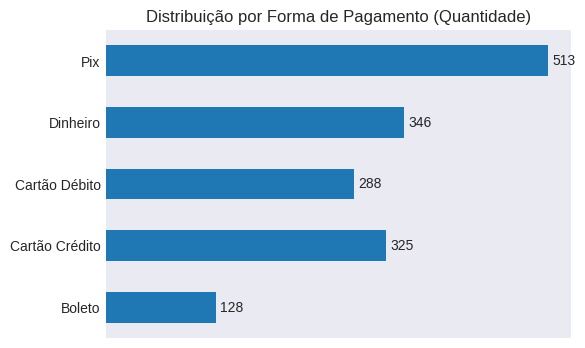

In [ ]:
# Gráfico de distribuição de forma de pagamento
dados = df.groupby('Forma_Pagamento').size()

ax = dados.plot(
    kind='barh',
    color=azul,
    figsize=(6,4))

ax.spines[['top','right']].set_visible(False)
plt.bar_label(ax.containers[0], padding=3)
ax.grid(False, axis='y')
ax.set_xticks([])
plt.xlabel(None)
plt.ylabel(None)
plt.title("Distribuição por Forma de Pagamento (Quantidade)")

plt.show()

In [ ]:
# # Calculate monthly revenue
# df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
# df['Mes'] = df['Data_Venda'].dt.to_period('M')
# df['Faturamento'] = df['Quantidade'] * df['Preço_Unitário'] * (1 - df['Desconto (%)'] / 100)
# monthly_revenue = df.groupby('Mes')['Faturamento'].sum().reset_index()

# # Convert 'Mes' to string for plotting
# monthly_revenue['Mes'] = monthly_revenue['Mes'].astype(str)

# # Plot monthly revenue
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=monthly_revenue, x='Mes', y='Faturamento')
# plt.title('Faturamento Mensal')
# plt.xlabel('Mês')
# plt.ylabel('Faturamento')
# plt.ylim(bottom=0) # Define o limite inferior do eixo y como 0
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()

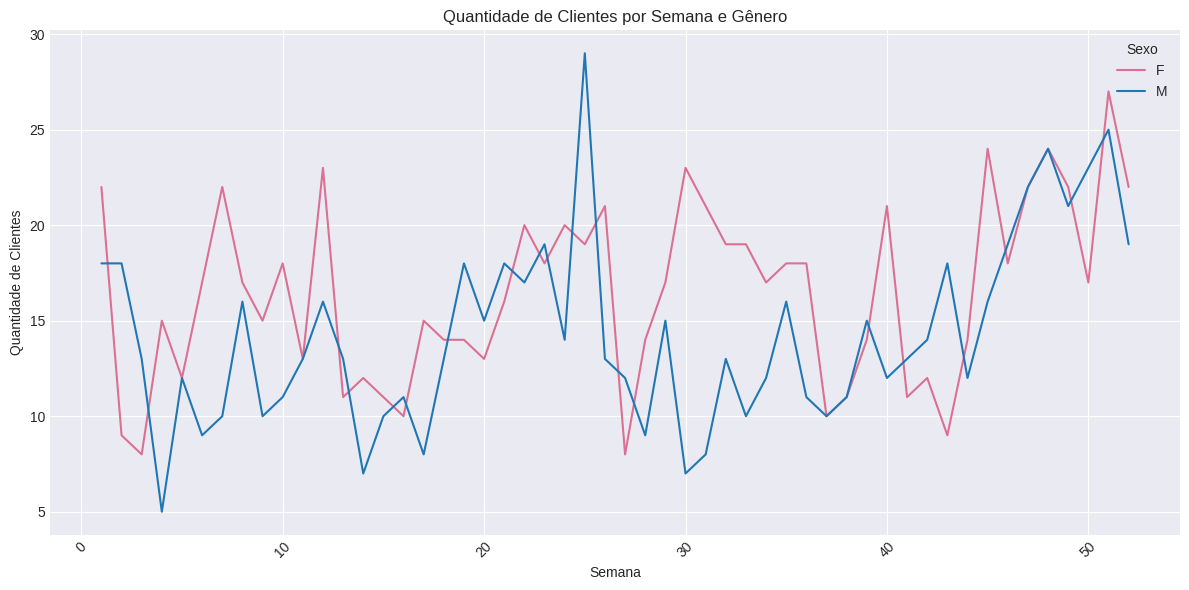

In [ ]:
# Gráfico de linhas com quantidade de clientes por semana e sexo
daily_clients = df.groupby(['Semana', 'Sexo']).size().reset_index(name='Quantidade_Clientes')

cores_personalizadas = {'F': rosa, 'M': azul}

# Plotar
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_clients, x='Semana', y='Quantidade_Clientes', hue='Sexo', palette=cores_personalizadas)
plt.title('Quantidade de Clientes por Semana e Gênero')
plt.xlabel('Semana')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

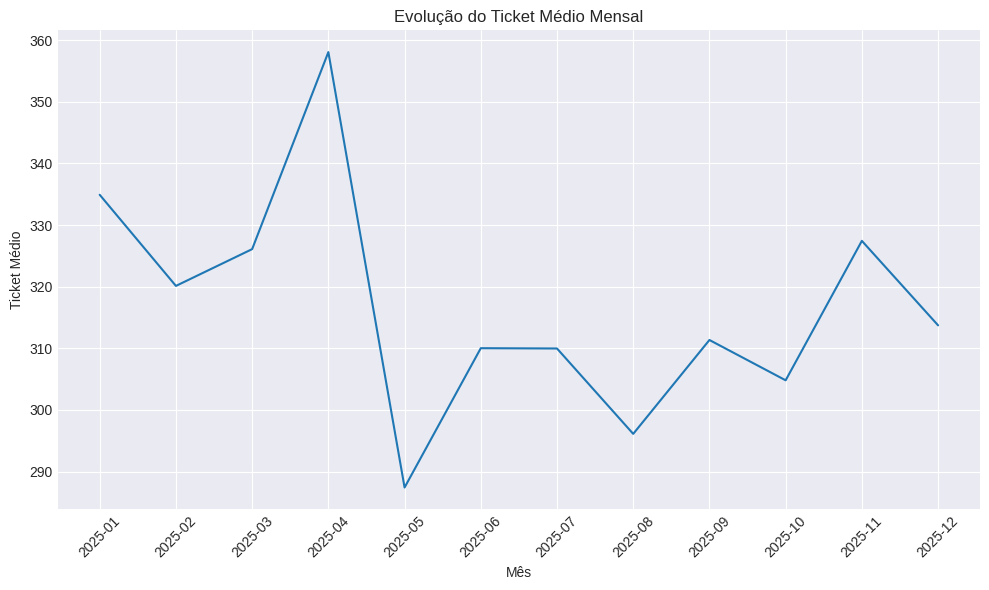

In [ ]:
# Calcular o ticket médio mensal:
df['Mes'] = df['Data_Venda'].dt.to_period('M')
monthly_ticket_medio = df.groupby('Mes')['Faturamento'].sum() / df.groupby('Mes')['ID_Venda'].count()
monthly_ticket_medio = monthly_ticket_medio.reset_index(name='Ticket_Medio')

# Converter 'Mes' pra string
monthly_ticket_medio['Mes'] = monthly_ticket_medio['Mes'].astype(str)

# Plotar
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_ticket_medio, x='Mes', y='Ticket_Medio')
plt.title('Evolução do Ticket Médio Mensal')
plt.xlabel('Mês')
plt.ylabel('Ticket Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

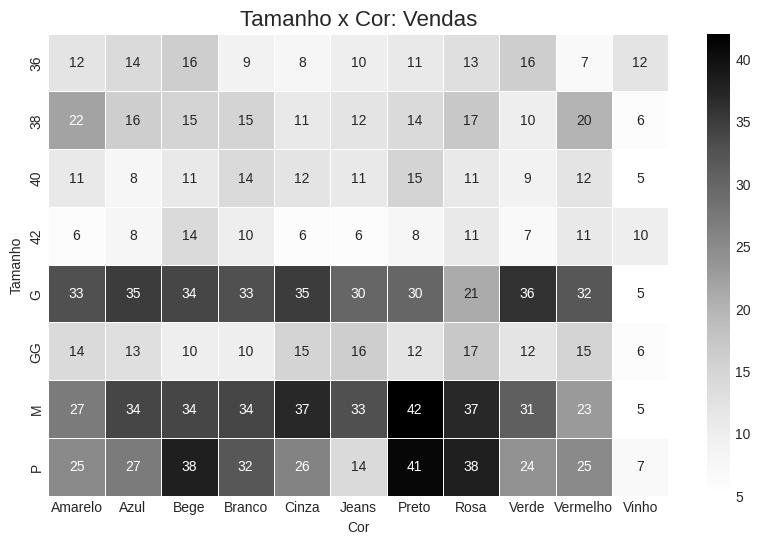

In [ ]:
# Gráfico de Heatmap

# Usar crosstab para contar as ocorrências de cada tamanho-cor:
df_wide = pd.crosstab(index=df['Tamanho'], columns=df['Cor'])

# Plotar:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_wide,
    cmap='Greys',
    linewidths=.5,
    linecolor='white',
    annot=True,
    fmt='d'
)

plt.title('Tamanho x Cor: Vendas', fontsize=16)
plt.xlabel('Cor')
plt.ylabel('Tamanho')

plt.show()

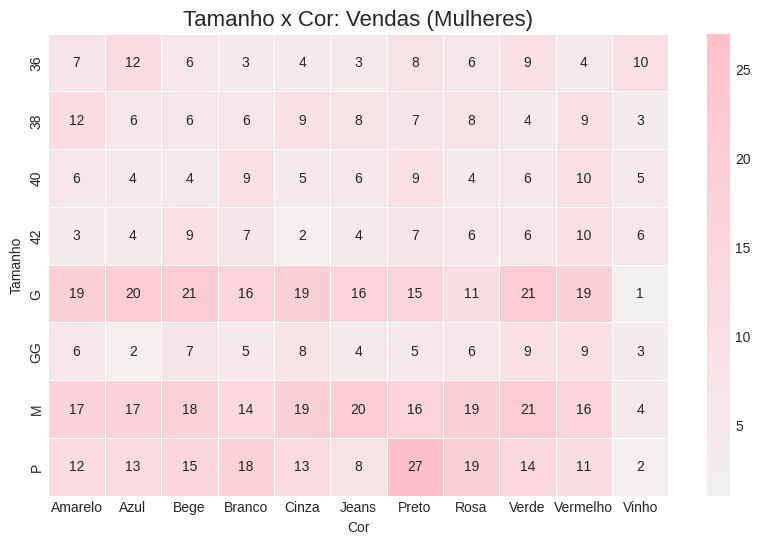

In [ ]:
df_F = df[df['Sexo']=='F']

df_wide_f = pd.crosstab(index=df_F['Tamanho'], columns=df_F['Cor'])
pink_cmap = sns.light_palette("pink", n_colors=6, as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
    df_wide_f,
    cmap=pink_cmap,
    linewidths=.5,
    linecolor='white',
    annot=True,
    fmt='d'
)

plt.title('Tamanho x Cor: Vendas (Mulheres)', fontsize=16)
plt.xlabel('Cor')
plt.ylabel('Tamanho')

plt.show()

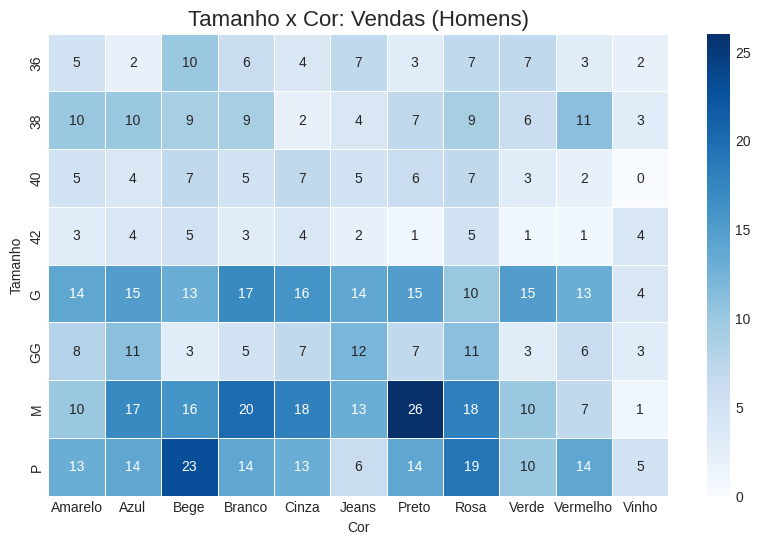

In [ ]:
df_H = df[df['Sexo']=='M']
df_wide_h = pd.crosstab(index=df_H['Tamanho'], columns=df_H['Cor'])

plt.figure(figsize=(10, 6))
sns.heatmap(
    df_wide_h,
    cmap='Blues',
    linewidths=.5,
    linecolor='white',
    annot=True,
    fmt='d'
)

plt.title('Tamanho x Cor: Vendas (Homens)', fontsize=16)
plt.xlabel('Cor')
plt.ylabel('Tamanho')

plt.show()